In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                             mean_squared_log_error)
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

princess_data = pd.read_csv('C:/Users/user/Desktop/shell/engineerProject/princess/disney_princess_popularity_dataset_300_rows.csv')

y = princess_data['PopularityScore']

features = ['FirstMovieYear', 'MovieRuntimeMinutes', 'NumberOfSongs',
            'RottenTomatoesScore', 'BoxOfficeMillions', 'AvgScreenTimeMinutes', 
            'NumMerchItemsOnAmazon', 'GoogleSearchIndex2024', 'InstagramFanPages', 'TikTokHashtagViewsMillions']
X = princess_data[features]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)
# print(princess_data['PopularityScore'])
# for cname in princess_data.columns:
    # if princess_data[cname].dtypes == 'int64':
        # print(cname)

In [16]:
XGB_model = XGBRegressor(
    n_estimators=1000, eta=0.01, max_depth=4, subsample=0.6, colsample_bytree=0.9)

XGB_model.fit(X_train, y_train)

predictions = XGB_model.predict(X_val)

In [17]:
# Calculate MAE
mae = mean_absolute_error(y_val, predictions)
mse = mean_squared_error(y_val, predictions)
msle = mean_squared_log_error(y_val, predictions)

# Uncomment to print MAE
print("\nMean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Mean Squared Log Error:", msle)


Mean Absolute Error: 13.73951072692871
Mean Squared Error: 258.12858145100665
Mean Squared Log Error: 0.04810100125936237


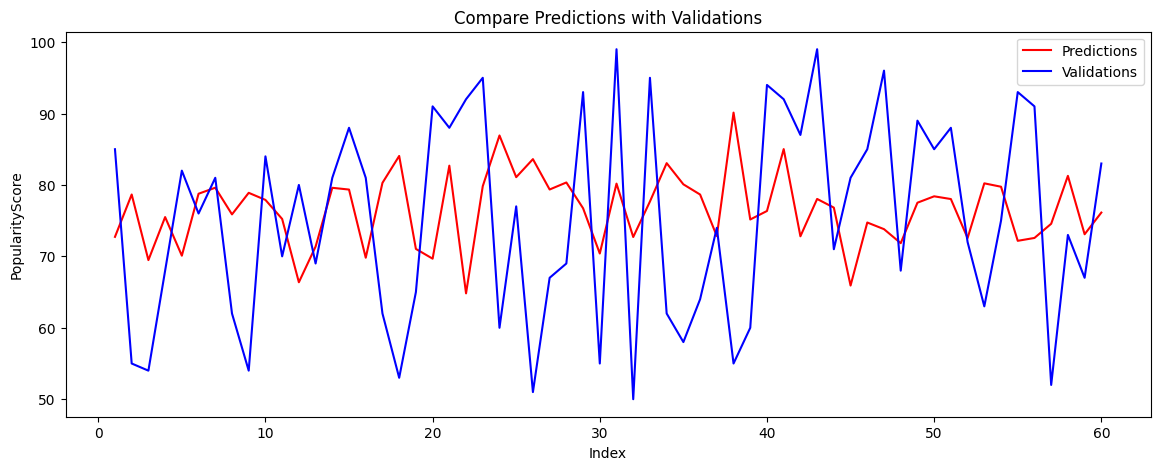

In [18]:
quantity = np.arange(1, len(predictions)+1)
fig = plt.figure(figsize=(14, 5))
plt.plot(quantity, predictions, 'r')
plt.plot(quantity, y_val, 'b')
plt.title('Compare Predictions with Validations')
plt.xlabel('Index')
plt.ylabel('PopularityScore')
plt.legend(['Predictions', 'Validations'])
plt.show()